In [2]:
%matplotlib notebook
import pickle
import pandas as pd
import sys
import plot_util
import pprint
import json
import os
from pathlib import Path
import util
from importlib import reload

pp = pprint.PrettyPrinter(indent=4)
myprint = pp.pprint
color_two_subbars = ["#BEBEBE"]*4

Saving the plot in  ../saves/vader_negation_only/vader_negation_only_dist_word_level_amz


<IPython.core.display.Javascript object>


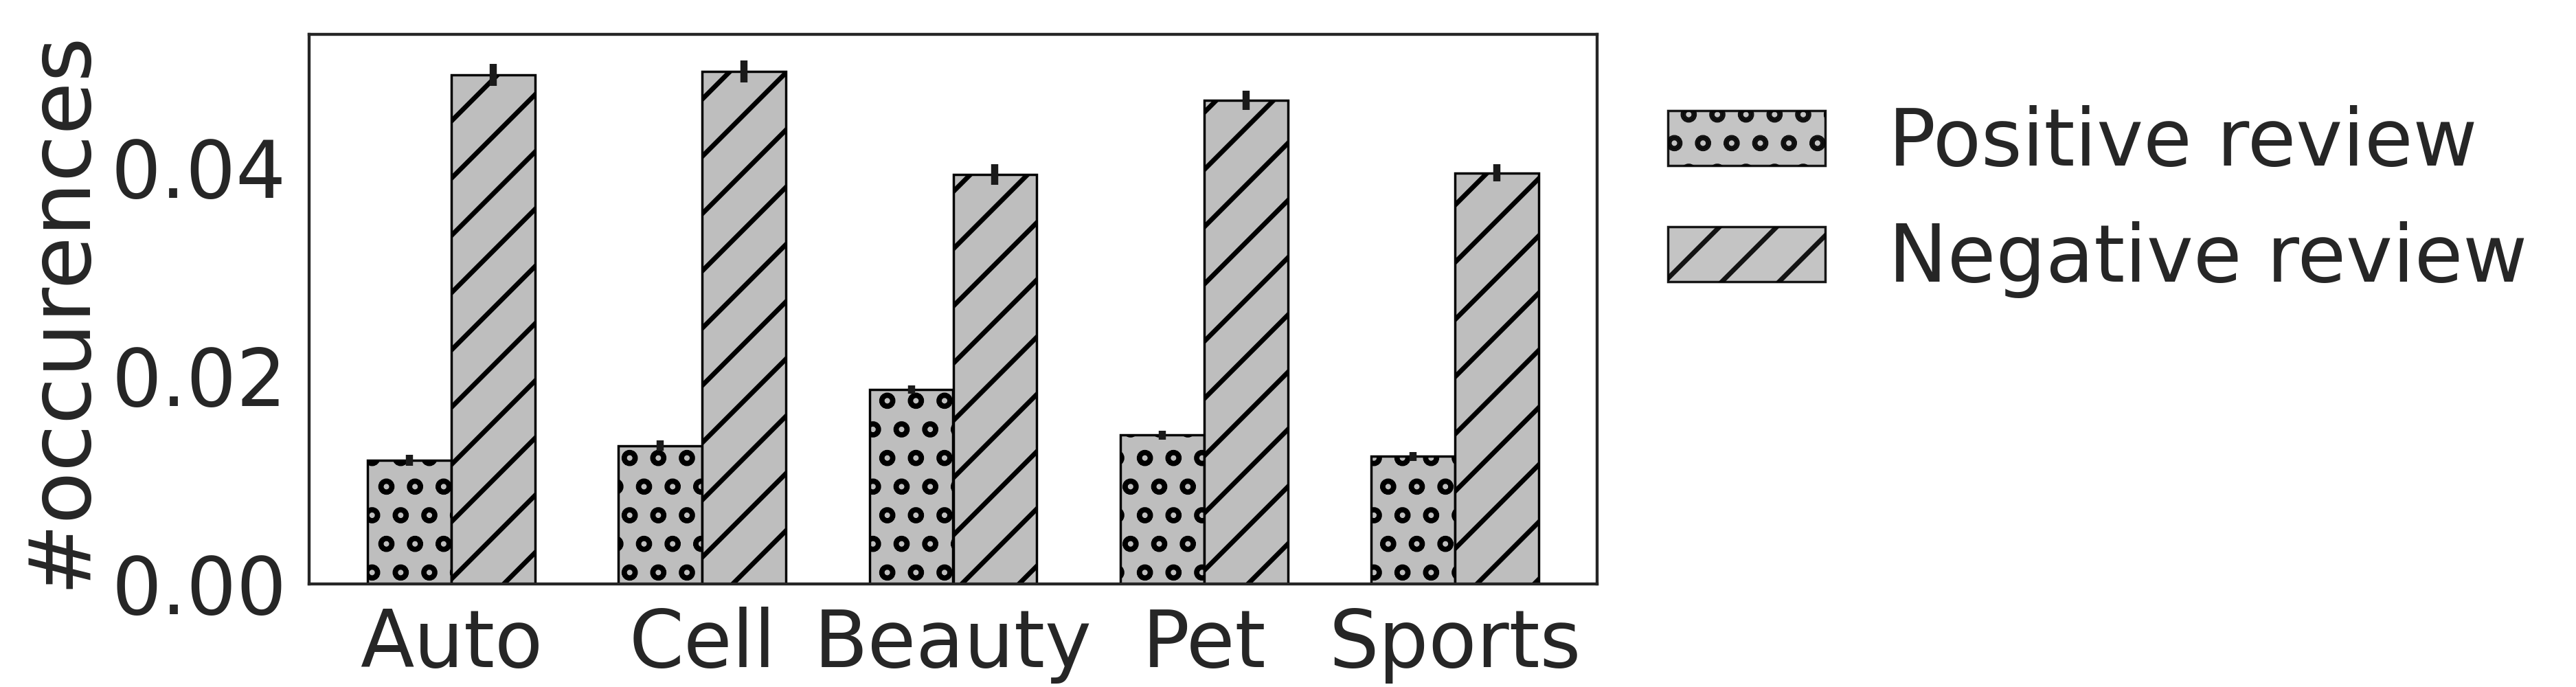

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


Saving the plot in  ../saves/vader_negation_only/vader_negation_only_dist_word_level_non_amz


<IPython.core.display.Javascript object>


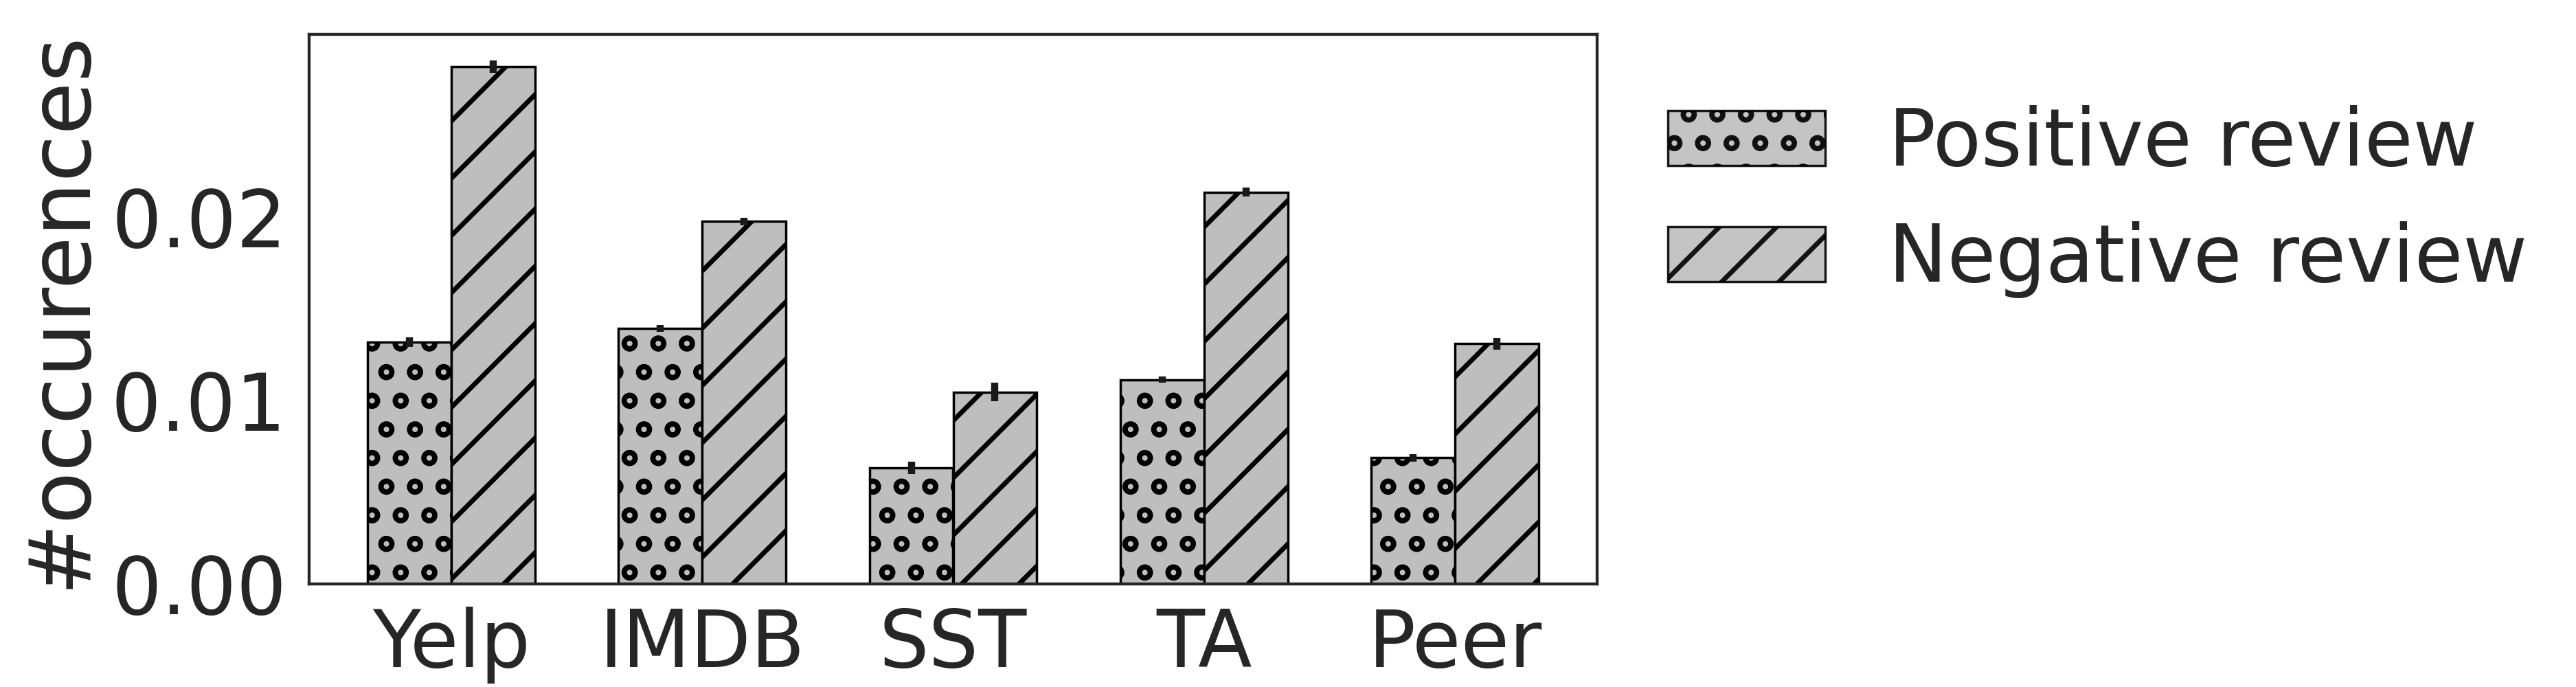

Saving the plot in  ../saves/vader_negation_only/vader_negation_only_dist_sent_level_amz


<IPython.core.display.Javascript object>


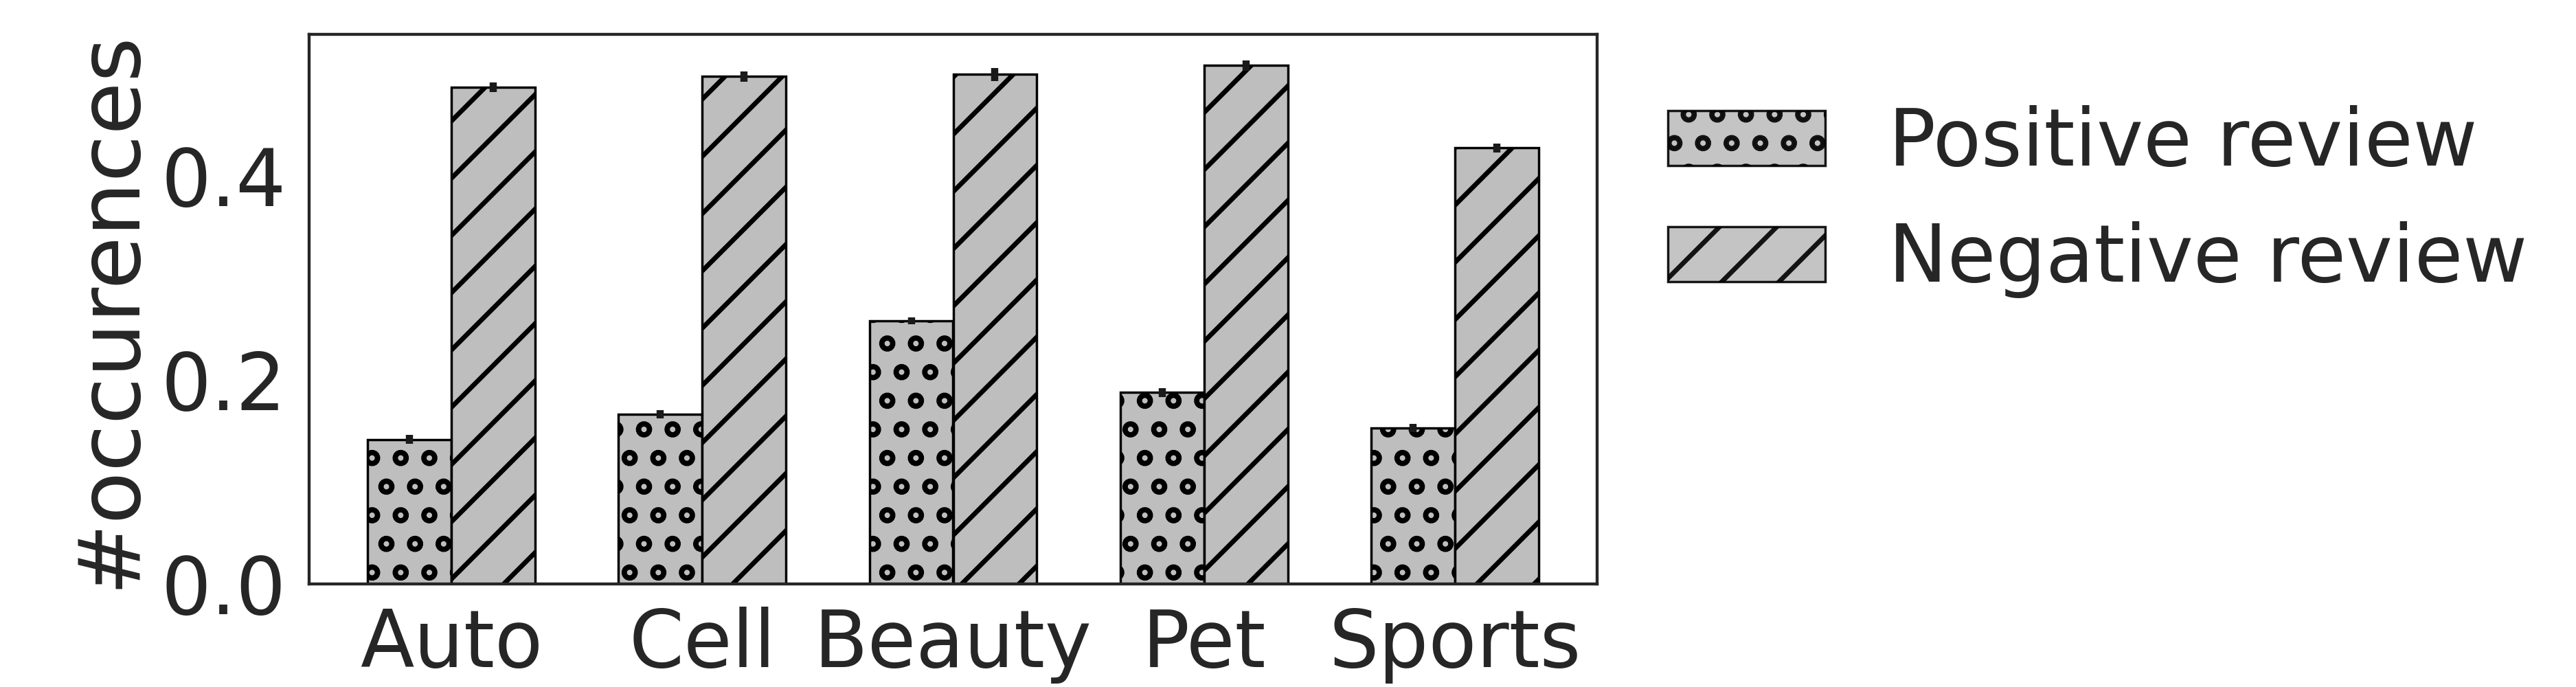

Saving the plot in  ../saves/vader_negation_only/vader_negation_only_dist_sent_level_non_amz


<IPython.core.display.Javascript object>


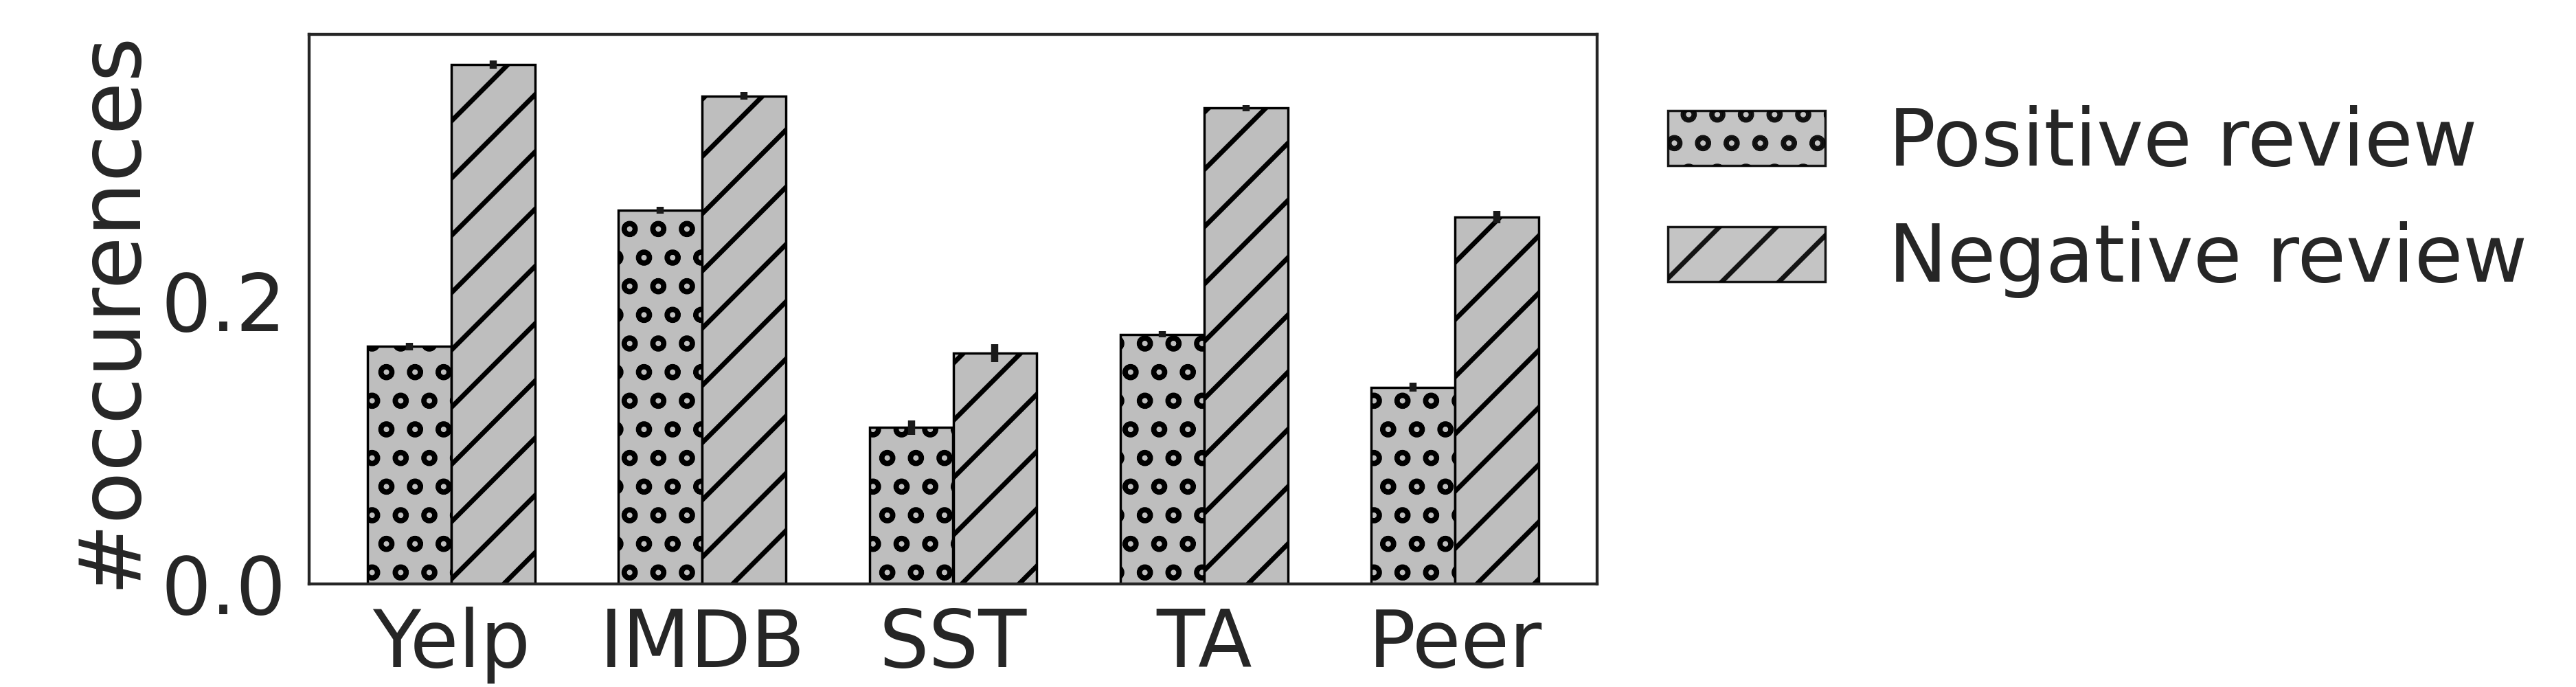

Saving the plot in  ../saves/vader_negation_only/vader_negation_only_dist_review_level_amz


<IPython.core.display.Javascript object>


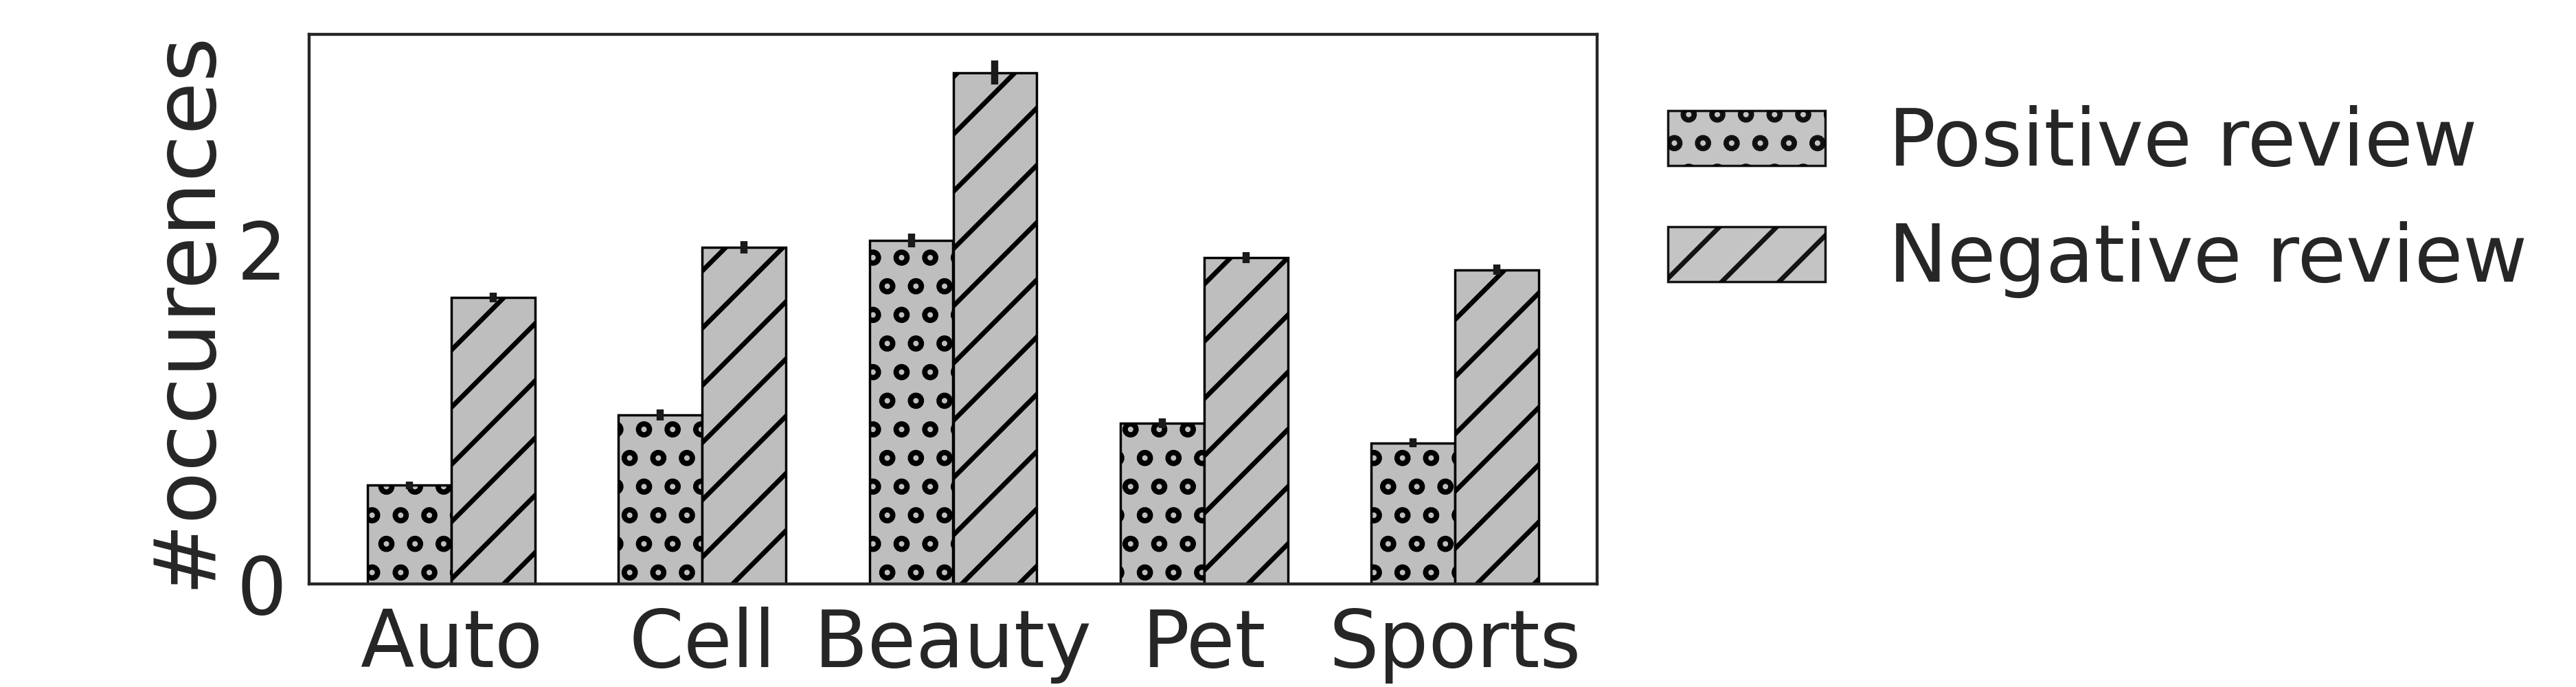

Saving the plot in  ../saves/vader_negation_only/vader_negation_only_dist_review_level_non_amz


<IPython.core.display.Javascript object>


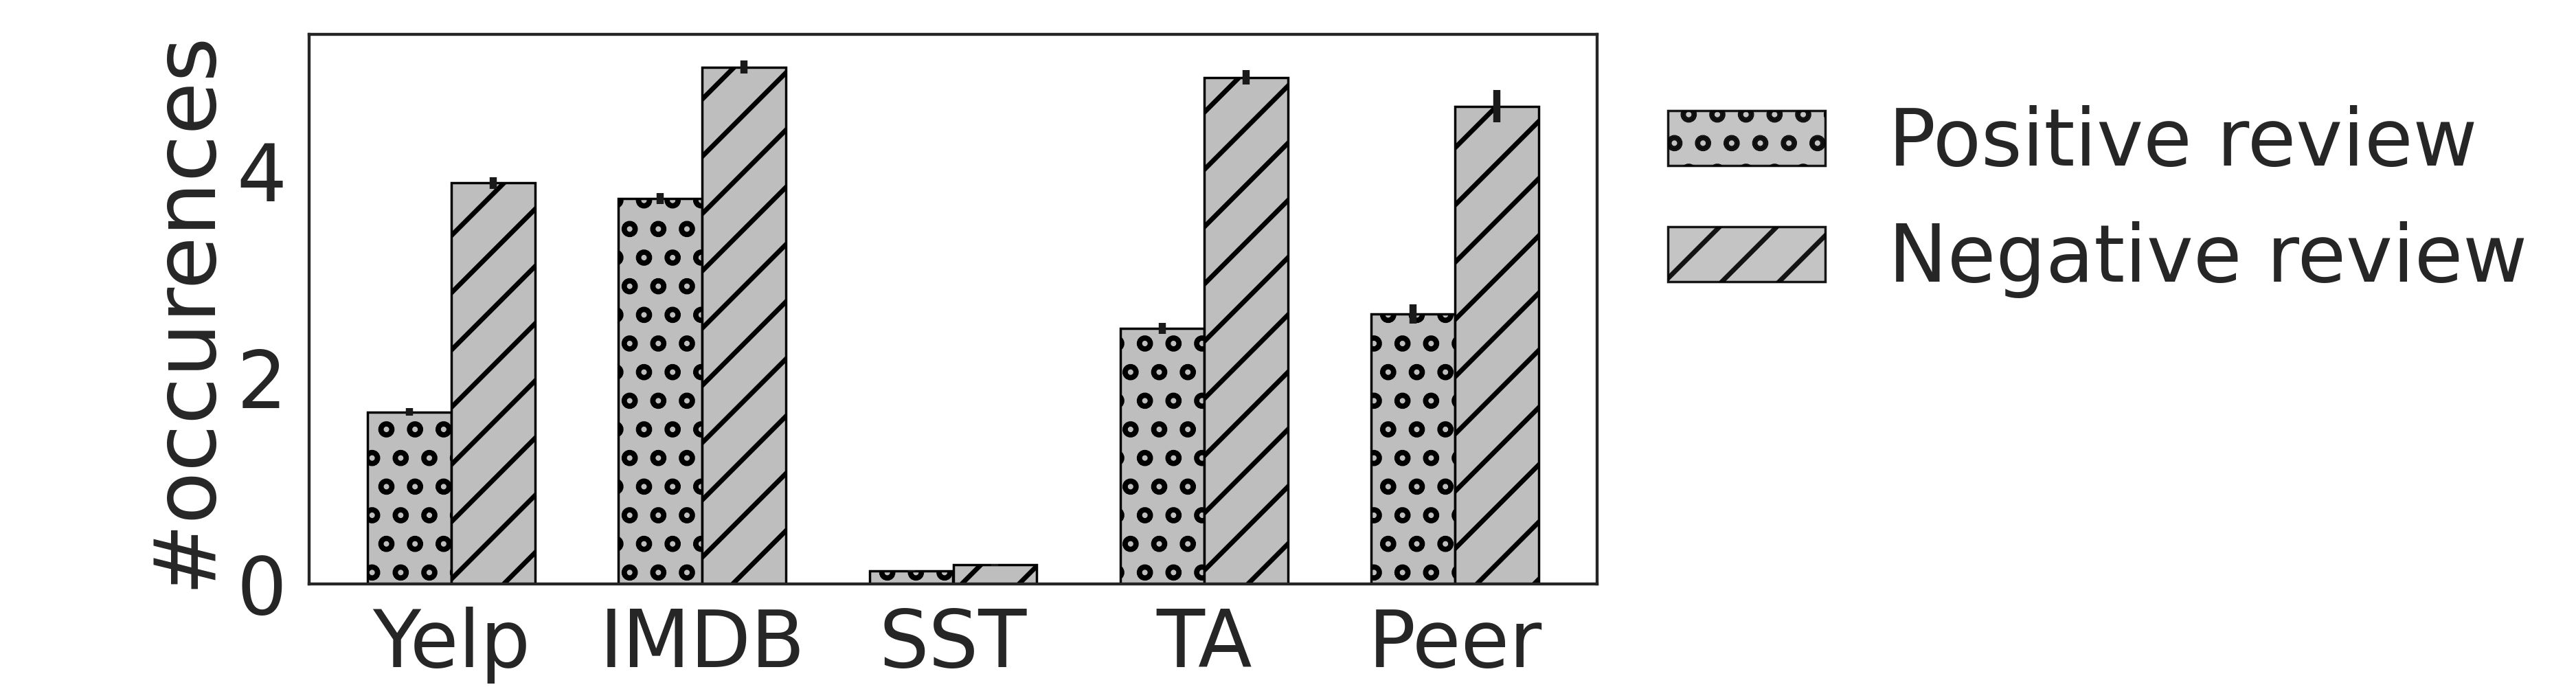

In [5]:
# Vader negation only distribution
saves_dir = os.path.join("../../saves", "vader_negation_only")
Path(saves_dir).mkdir(parents=True, exist_ok=True)   
plot_save_prefix = "vader_negation_only_dist"

seed_vals = [23]
plot_data = {
    "word_level": [],
    "sent_level": [],
    "review_level": []
}
analysis_types = list(plot_data.keys())
plot_data = pickle.load(open(os.path.join(saves_dir, plot_save_prefix+".pickle"), "rb"))
reload(plot_util)

for analysis in analysis_types:
    amazon_data, non_amazon_data = plot_util.filter_plot_data(plot_data[analysis])    

    plot_util.draw_grouped_bargraph_two_subbars(amazon_data, "name", "value", 
        "category", 
        plot_savepath=os.path.join(saves_dir, plot_save_prefix+"_"+analysis+"_amz"),
        figsize=(15, 4), 
        y_axis_name="#occurences",
        position=(0.12, 0.15, 0.5, 0.8),
        bbox_to_anchor=(1, 0.5, 0.2, 0.5), 
        amazon_data_flag=True, colors=color_two_subbars)

    plot_util.draw_grouped_bargraph_two_subbars(non_amazon_data, "name", "value", 
        "category", 
        plot_savepath=os.path.join(saves_dir, plot_save_prefix+"_"+analysis+"_non_amz"),
        figsize=(15, 4), 
        y_axis_name="#occurences",
        position=(0.12, 0.15, 0.5, 0.8),
        bbox_to_anchor=(1, 0.5, 0.2, 0.5), 
        amazon_data_flag=False, colors=color_two_subbars)

'word_level'



Saving the plot in  ../saves/vader_pos_neg_negation_dist/vader_pos_neg_negation_dist_word_level_non_amz


<IPython.core.display.Javascript object>


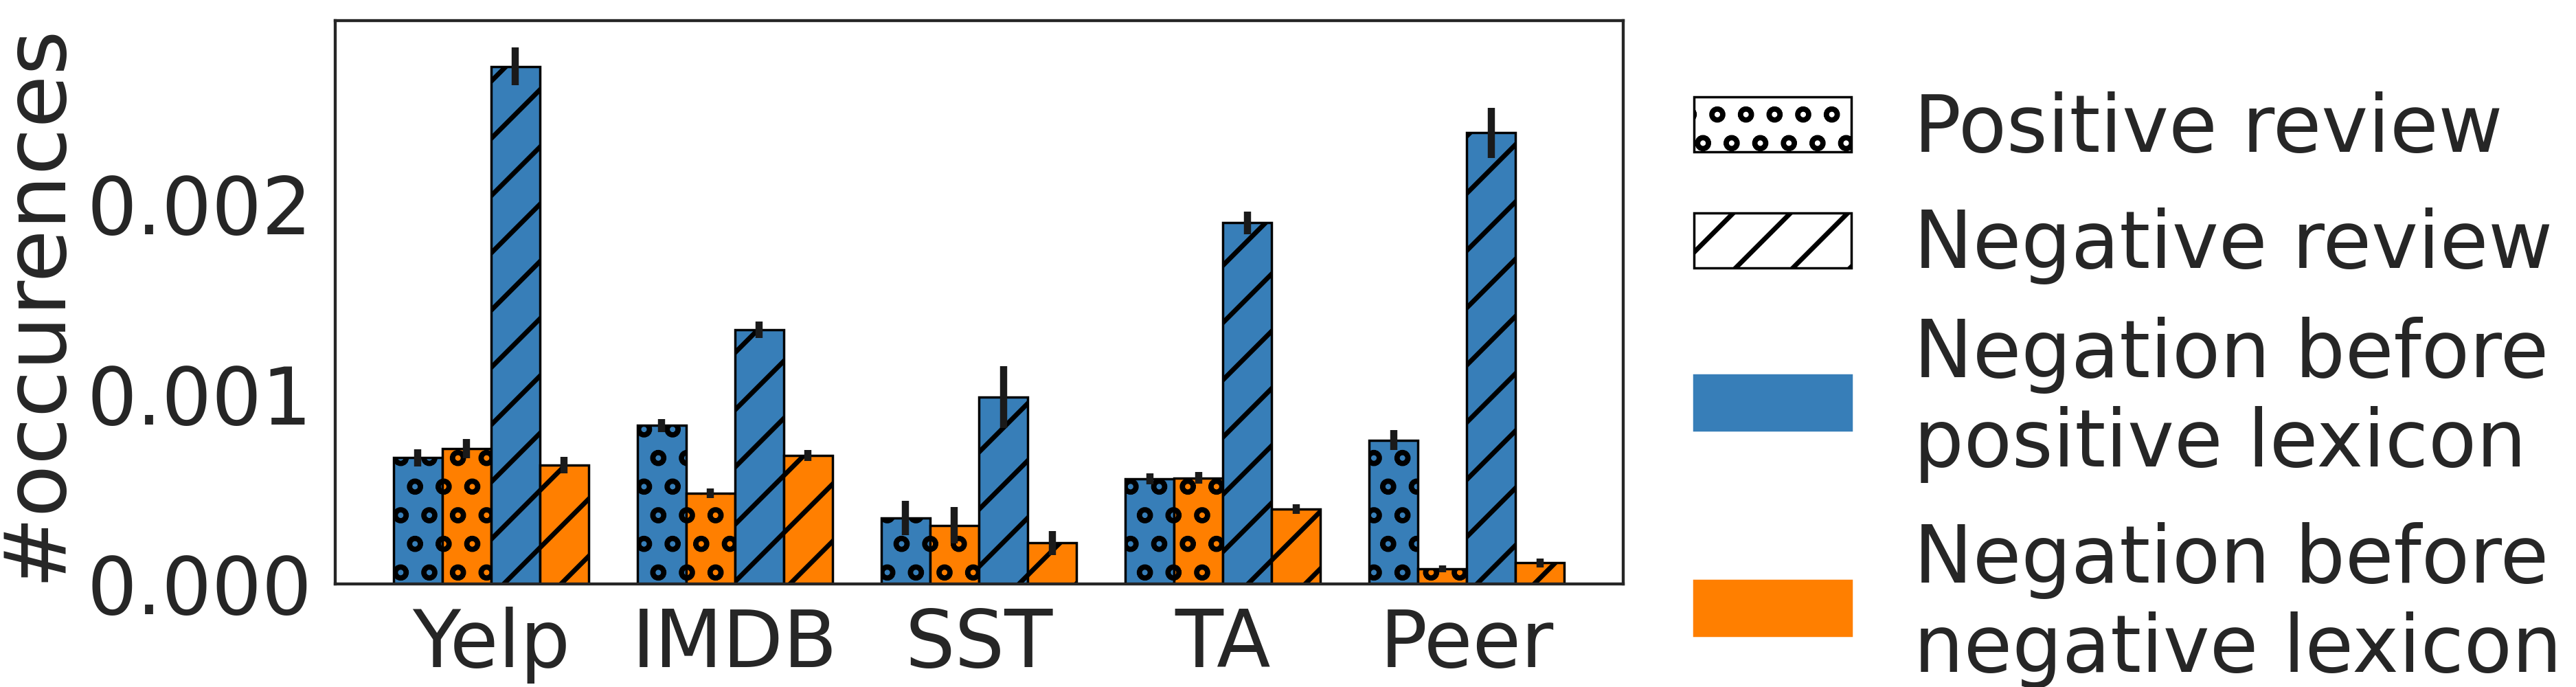




Saving the plot in  ../saves/vader_pos_neg_negation_dist/vader_pos_neg_negation_dist_word_level_amz


<IPython.core.display.Javascript object>


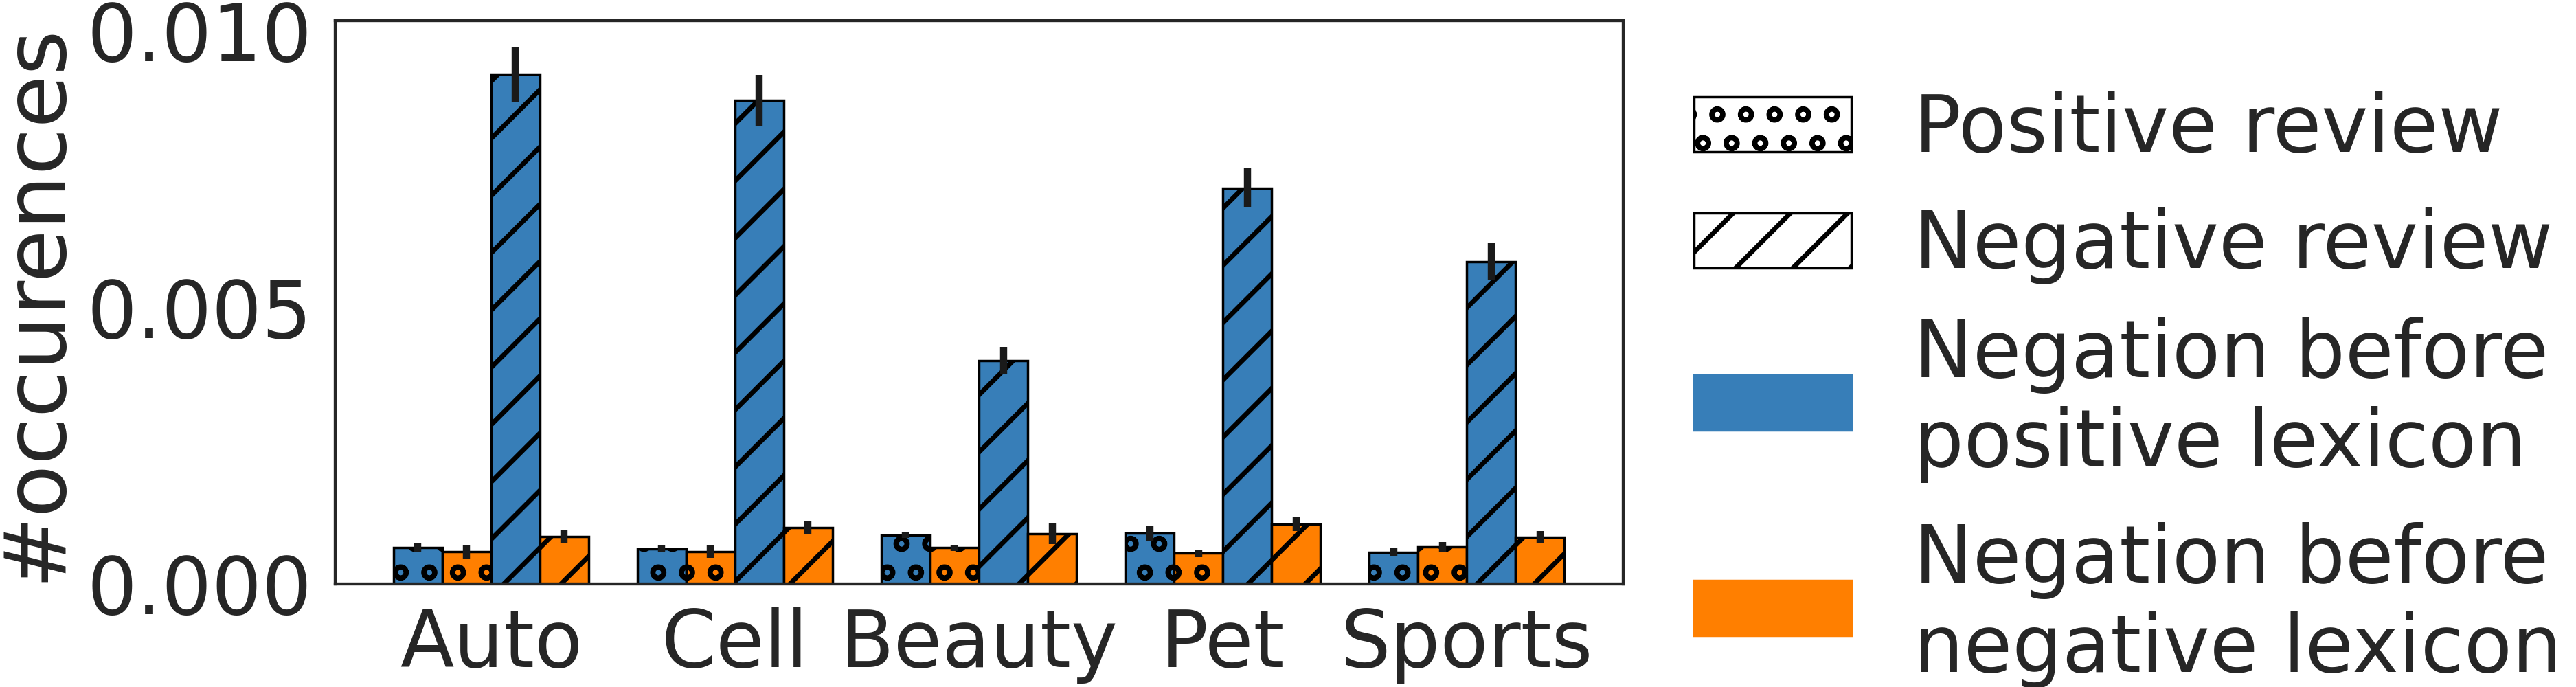

'sent_level'



Saving the plot in  ../saves/vader_pos_neg_negation_dist/vader_pos_neg_negation_dist_sent_level_non_amz


<IPython.core.display.Javascript object>


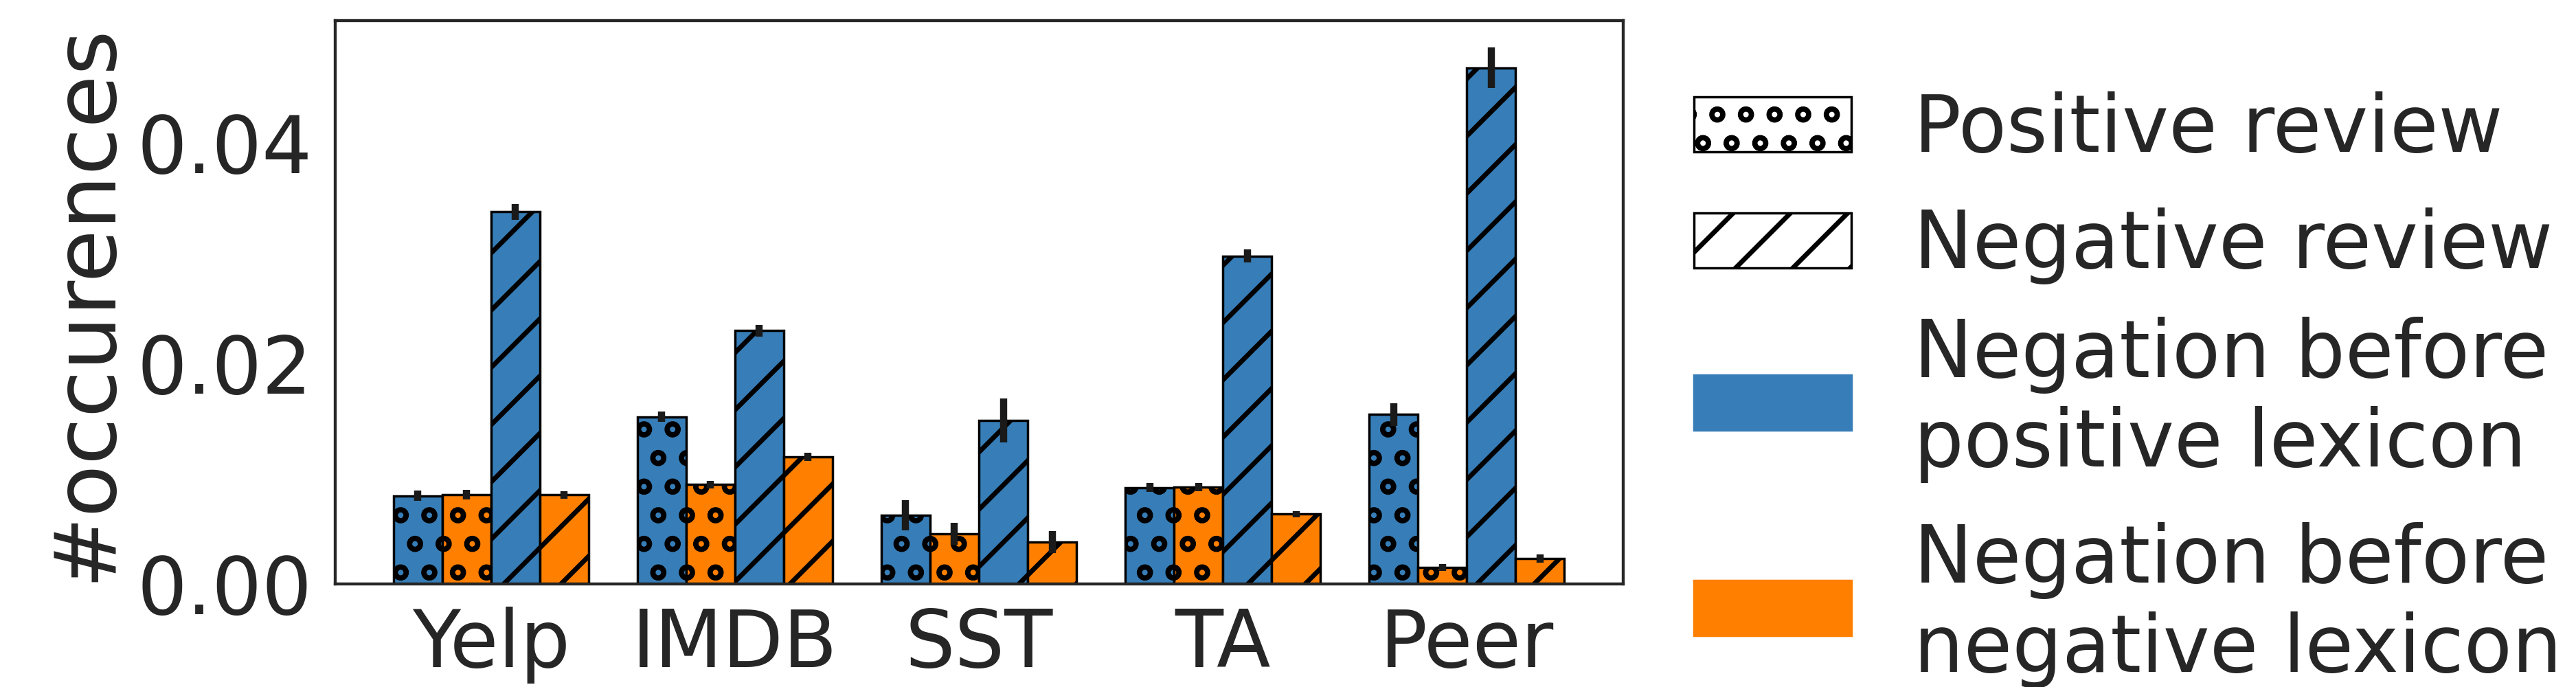




Saving the plot in  ../saves/vader_pos_neg_negation_dist/vader_pos_neg_negation_dist_sent_level_amz


<IPython.core.display.Javascript object>


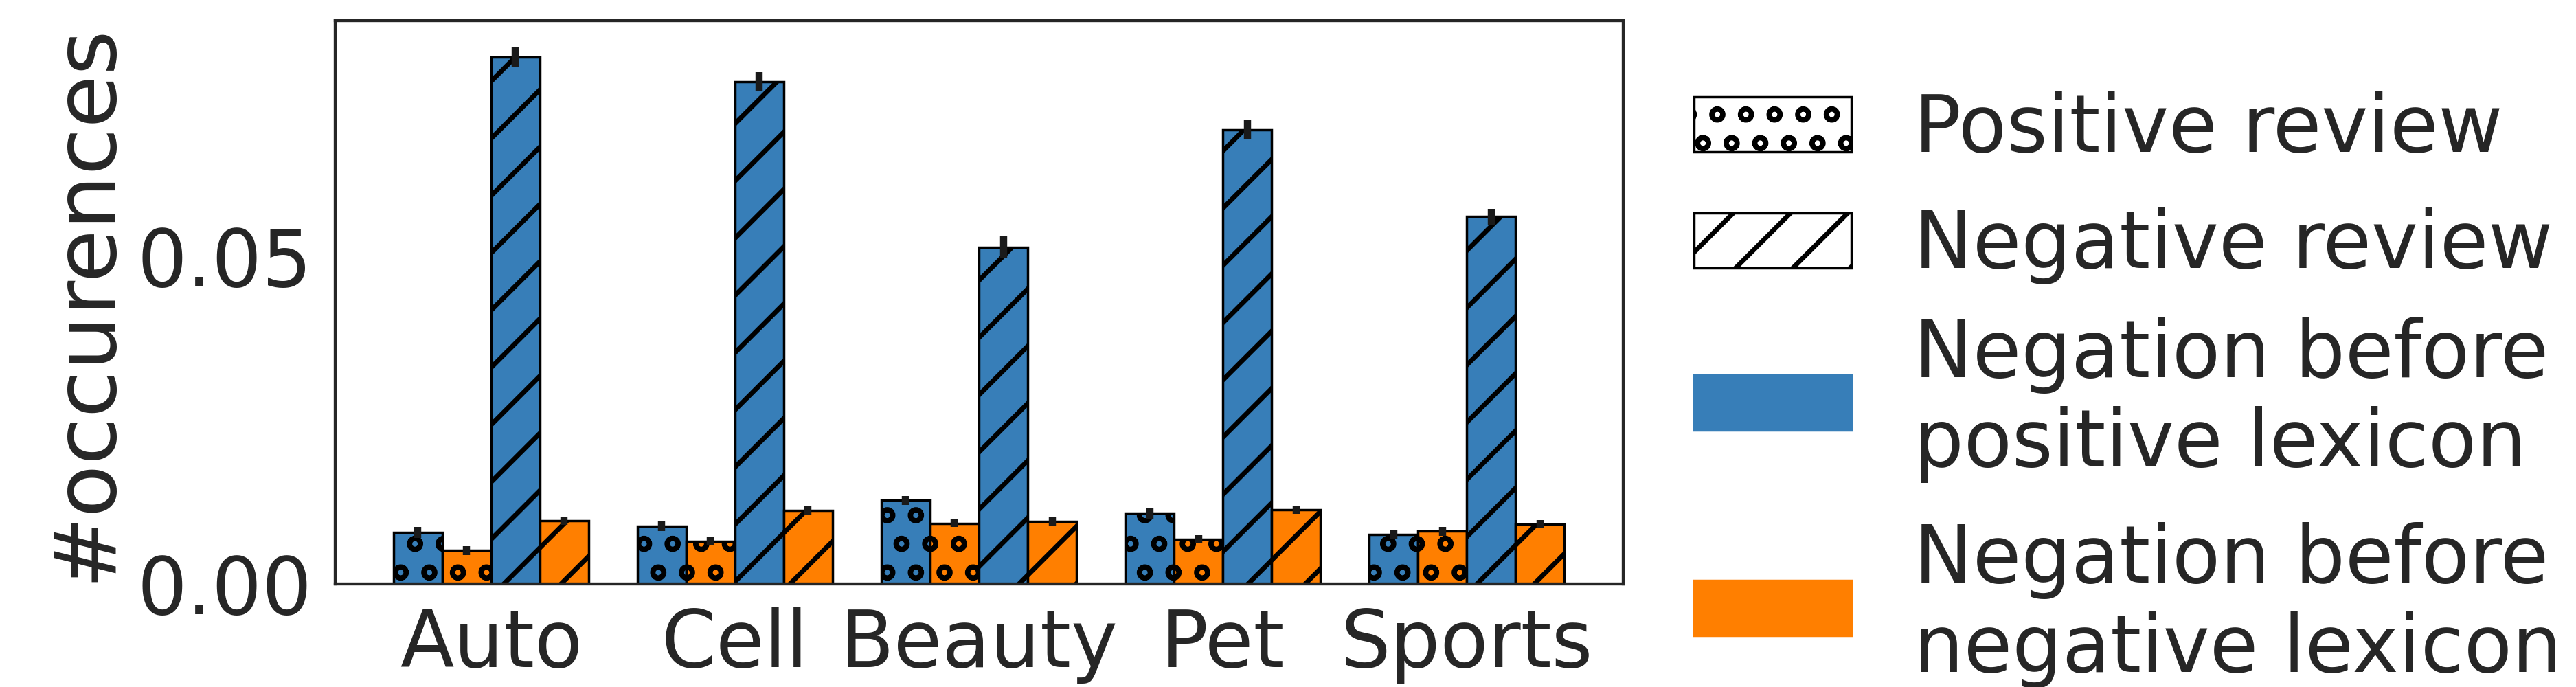

'review_level'



Saving the plot in  ../saves/vader_pos_neg_negation_dist/vader_pos_neg_negation_dist_review_level_non_amz


<IPython.core.display.Javascript object>


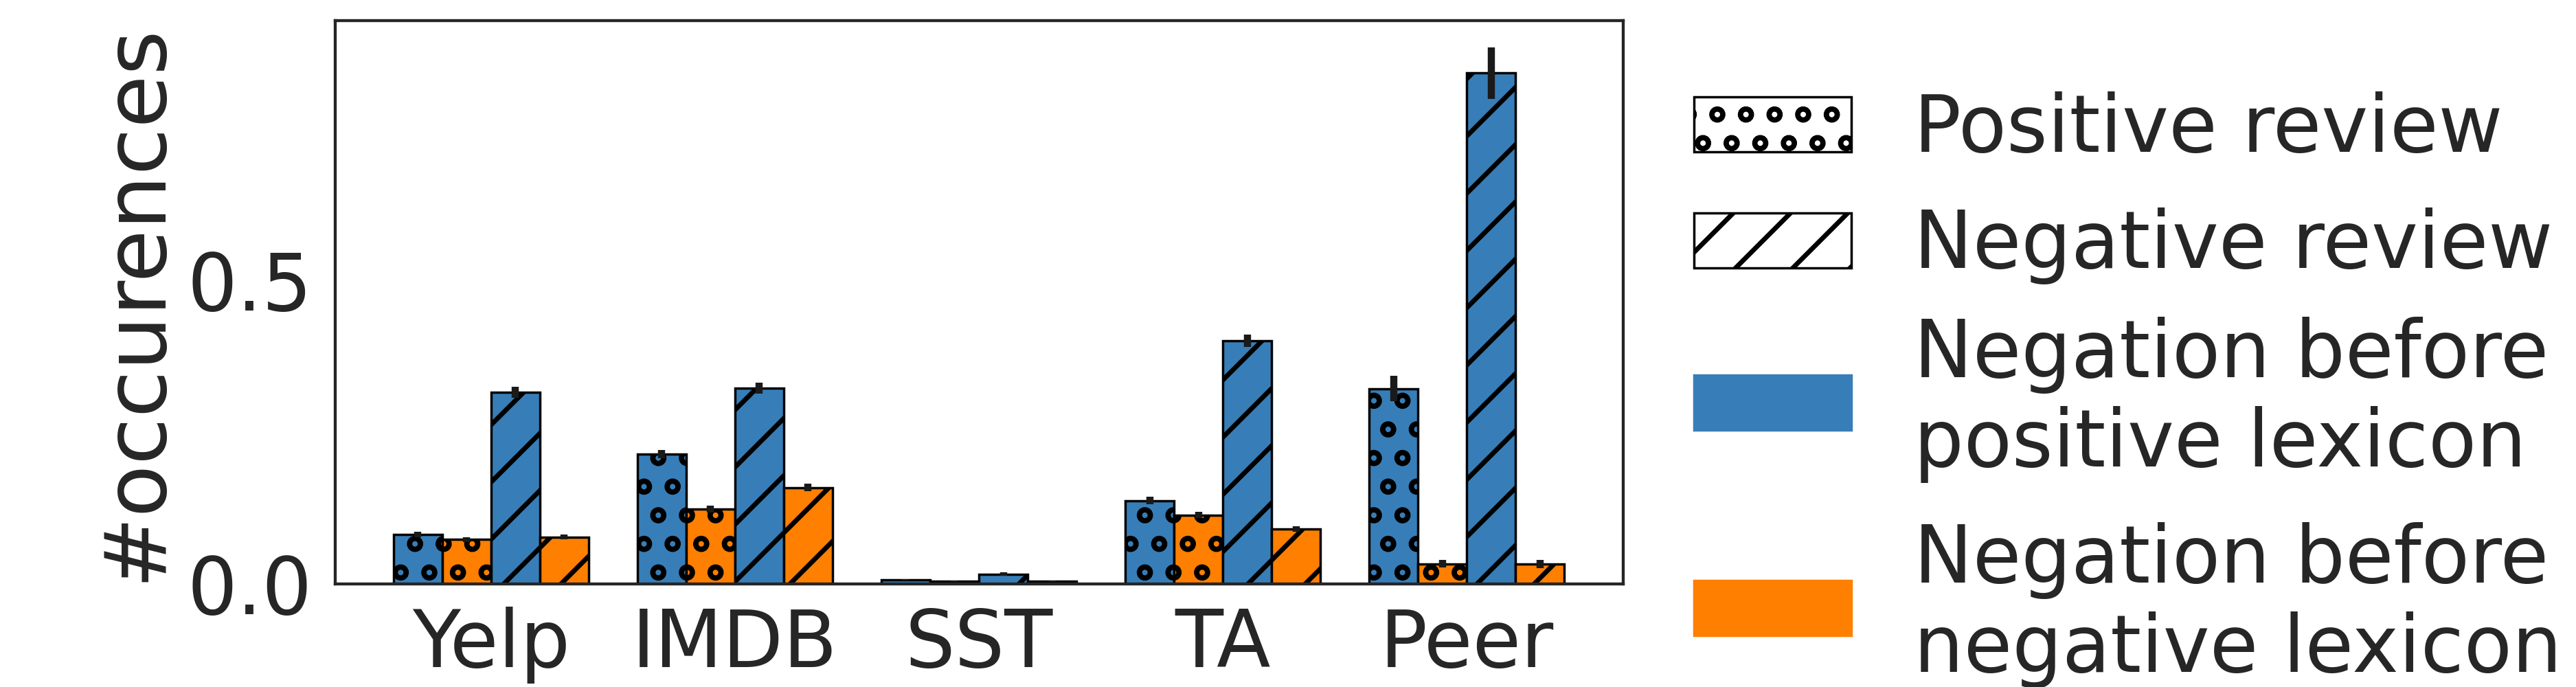




Saving the plot in  ../saves/vader_pos_neg_negation_dist/vader_pos_neg_negation_dist_review_level_amz


<IPython.core.display.Javascript object>


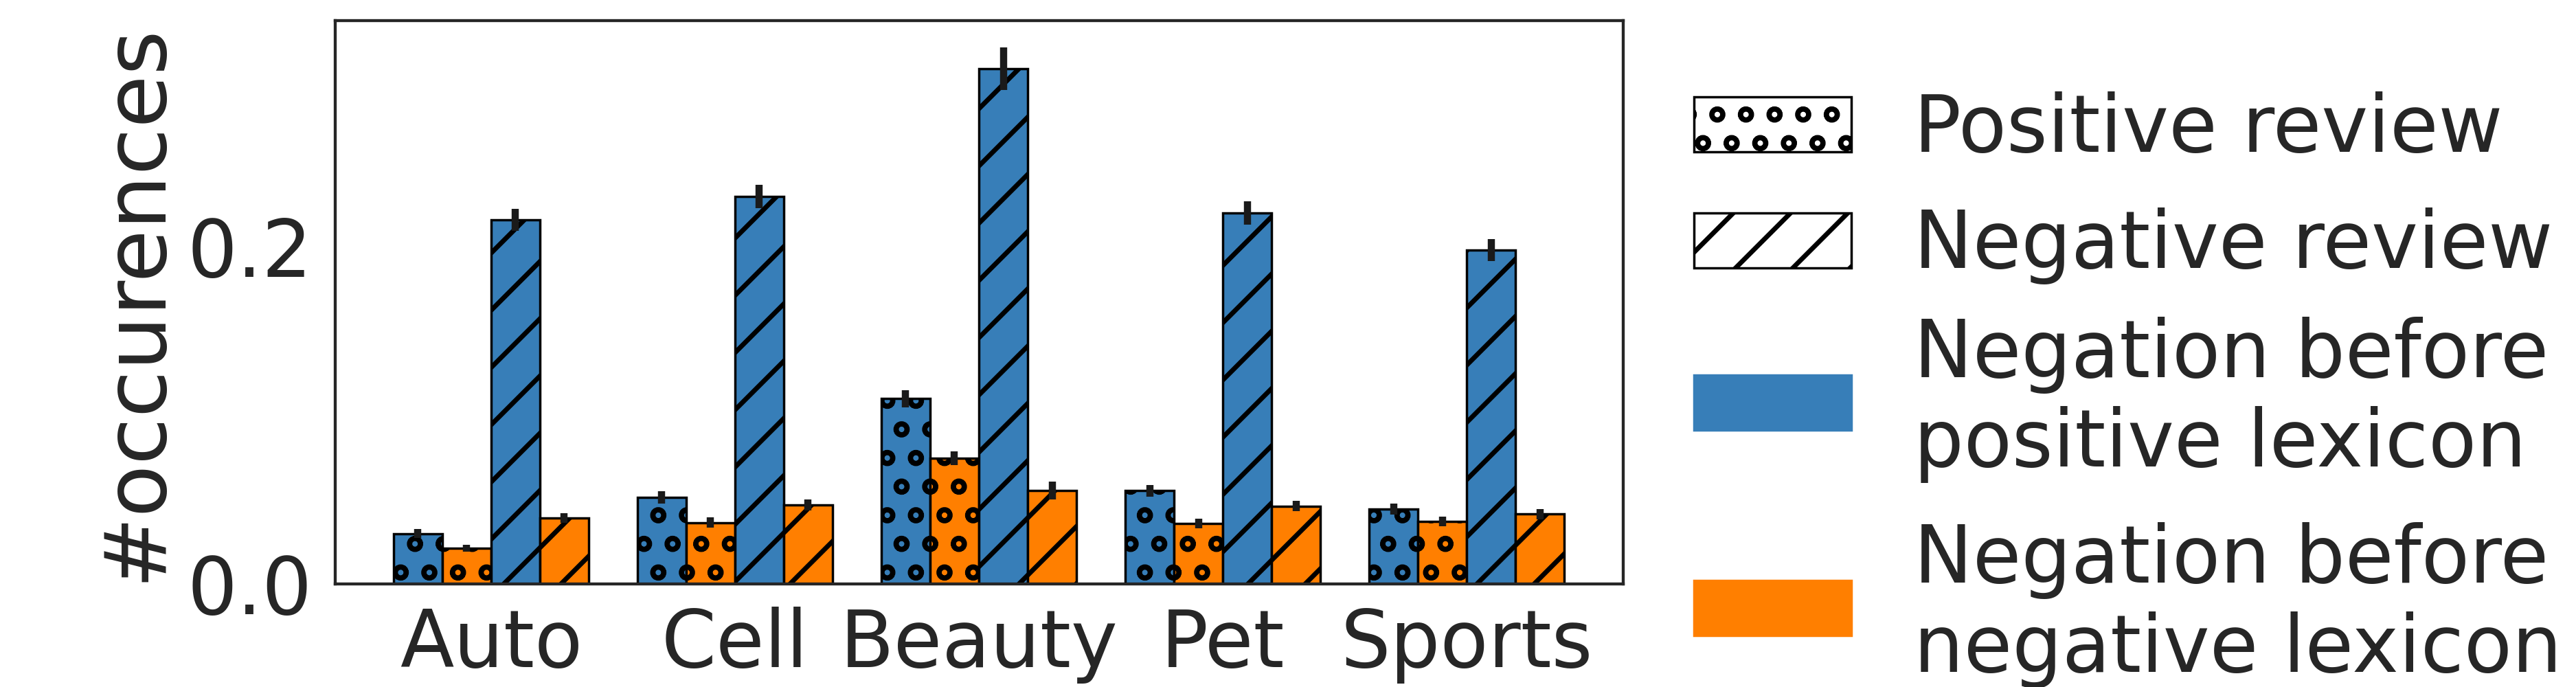

In [7]:
reload(plot_util)
colors_four_subbars = [('#377eb8'), ('#ff7f00')]*2
saves_dir = os.path.join("../../saves", "vader_pos_neg_negation_dist")
Path(saves_dir).mkdir(parents=True, exist_ok=True) 
datasets = json.loads(open("../../input.json").read())
preload_flag = True
plot_save_prefix = "vader_pos_neg_negation_dist"
analysis_types = [
    "word_level", 
    "sent_level", 
    "review_level"
]
plot_data = pickle.load(open(os.path.join(saves_dir, plot_save_prefix+".pickle"), "rb"))
all_reviews_data = {}

for analysis in analysis_types: 
    myprint(analysis)
    amazon_data, non_amazon_data = plot_util.filter_plot_data(plot_data[analysis])
    plot_util.draw_grouped_bargraph_four_subbars(non_amazon_data, "name", "value", 
        "review category", "text sentiment",
        os.path.join(saves_dir, plot_save_prefix+"_"+analysis+"_non_amz"),
        figsize=(15, 4), position=(0.13, 0.15, 0.5, 0.82),
        bbox_to_anchor=(1, 0.5, 0.2, 0.5),
        y_axis_name="#occurences",
        negation=True, colors=colors_four_subbars)
    plot_util.draw_grouped_bargraph_four_subbars(amazon_data, "name", "value", 
        "review category", "text sentiment",
        os.path.join(saves_dir,
        plot_save_prefix+"_"+str(analysis)+"_amz"),
        figsize=(15, 4), position=(0.13, 0.15, 0.5, 0.82),
        bbox_to_anchor=(1, 0.5, 0.2, 0.5),
        amazon_data_flag=True,
        y_axis_name="#occurences",
        negation=True, colors=colors_four_subbars)